In [109]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir("C:\\Users\\Hareetima\\OneDrive\\Desktop\\learnflow")
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [110]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [111]:
cur_path

'C:\\Users\\Hareetima\\OneDrive\\Desktop\\learnflow'

In [113]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [114]:
#converting list into numpy array
data = np.array(data)
labels = np.array(labels)

In [115]:
#saving labels and data for future use
# os.mkdir('training')
#np.save('C:\\Users\\Hareetima\\OneDrive\\Desktop\\learnflow\\archive (1).zip\\Train', data)
np.save('./training/data',data)
np.save('./training/target',labels)
#np.save('./train',data)
#np.save('./test',labels)

In [116]:
#load data and labels
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [117]:
print(data.shape, labels.shape)

(78418, 30, 30, 3) (78418,)


In [118]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [119]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(62734, 30, 30, 3) (15684, 30, 30, 3) (62734,) (15684,)


In [120]:
#Convert labels to onehot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [121]:
#now buildinf model

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [122]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [123]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
1961/1961 [==============================] - 48s 24ms/step - loss: 1.4432 - accuracy: 0.6166 - val_loss: 0.2879 - val_accuracy: 0.9214
Epoch 2/20
1961/1961 [==============================] - 48s 25ms/step - loss: 0.4439 - accuracy: 0.8705 - val_loss: 0.1086 - val_accuracy: 0.9704
Epoch 3/20
1961/1961 [==============================] - 50s 25ms/step - loss: 0.2908 - accuracy: 0.9177 - val_loss: 0.0945 - val_accuracy: 0.9737
Epoch 4/20
1961/1961 [==============================] - 50s 26ms/step - loss: 0.2573 - accuracy: 0.9287 - val_loss: 0.0556 - val_accuracy: 0.9838
Epoch 5/20
1961/1961 [==============================] - 55s 28ms/step - loss: 0.2295 - accuracy: 0.9382 - val_loss: 0.0711 - val_accuracy: 0.9801
Epoch 6/20
1961/1961 [==============================] - 60s 31ms/step - loss: 0.2278 - accuracy: 0.9391 - val_loss: 0.0549 - val_accuracy: 0.9844
Epoch 7/20
1961/1961 [==============================] - 58s 30ms/step - loss: 0.2081 - accuracy: 0.9457 - val_loss: 0.0292 -

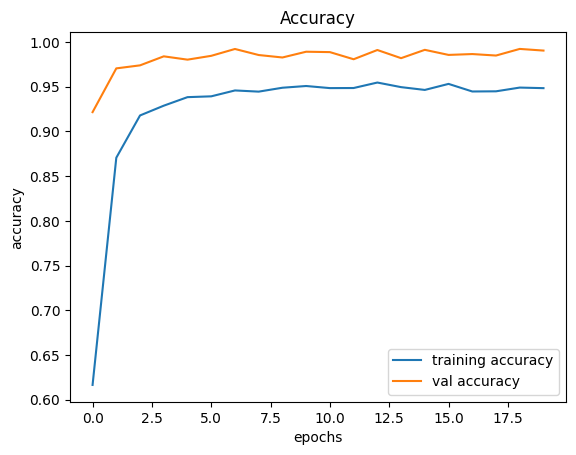

In [124]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

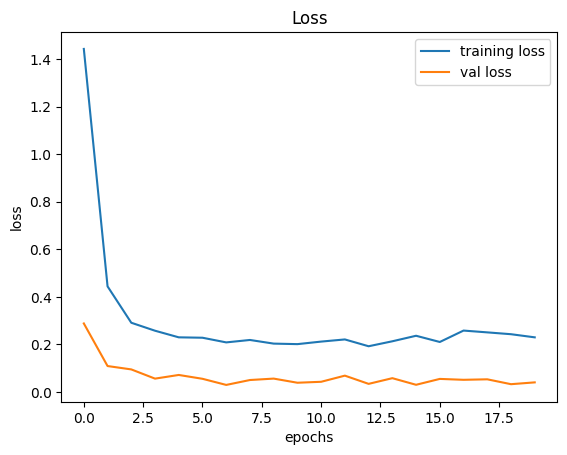

In [125]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [126]:
#testing on test data

In [127]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [130]:
X_test, label = testing('Test.csv')

In [145]:
# Assuming 'model' is your Keras Sequential model
Y_pred_probabilities = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred_probabilities, axis=1)

# Now 'Y_pred_classes' contains the predicted class labels for each sample
Y_pred_classes

395/395 [==============================] - 5s 14ms/step


array([16,  1, 38, ..., 32,  7, 10], dtype=int64)

In [149]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred_classes))

0.9586698337292161


In [150]:
model.save("./training/TSR.h5")

C:\Users\Hareetima\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [151]:
def image_processing(img):
    model = load_model('./model/traffic_classifier.h5')
    image = Image.open(img)
    image = image.resize((30,30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    predict_x=model.predict(image)
    classes_x=np.argmax(predict_x,axis=1)
    sign = classes[int(classes_x)]
    return sign     #return index of classes

In [152]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work',  
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [153]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

1/1 [==============================] - 0s 28ms/step


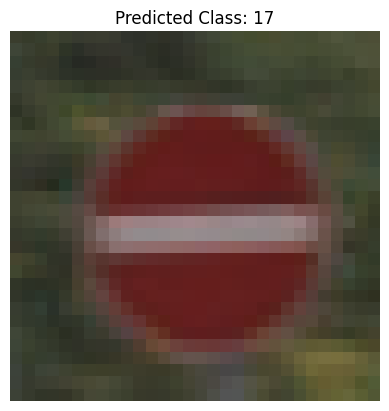

In [157]:
import matplotlib.pyplot as plt

def test_on_img(img_path):
    data = []
    if os.path.exists(img_path):
        try:
            if img_path.endswith('.npy'):
                # Handle loading images from a NumPy file
                data = np.load(img_path)
            else:
                # Handle loading a single image
                image = Image.open(img_path)
                image = image.resize((30, 30))
                data.append(np.array(image))
                
            X_test = np.array(data)
            Y_pred_probabilities = model.predict(X_test)
            Y_pred_classes = np.argmax(Y_pred_probabilities, axis=1)
            
            return image, Y_pred_classes
        except Exception as e:
            print(f"Error processing image: {e}")
            return None, None
    else:
        print(f"Error: File not found at path: {img_path}")
        return None, None

# Example usage
image, prediction = test_on_img(r'C:\\Users\\Hareetima\\OneDrive\\Desktop\\learnflow\\Test\\00031.png')
if image is not None and prediction is not None:
    plt.imshow(image)
    plt.title(f"Predicted Class: {prediction[0]}")  # Assuming you're interested in the first prediction
    plt.axis('off')
    plt.show()
else:
    print("Image data or prediction is not available.")


1/1 [==============================] - 0s 33ms/step


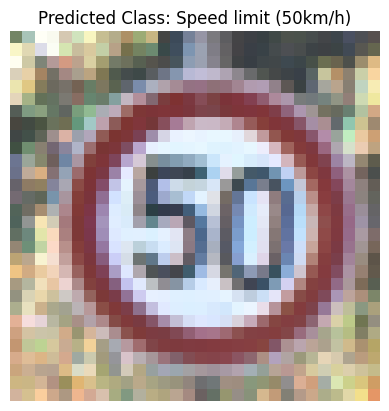

In [165]:
import matplotlib.pyplot as plt

# Your classes dictionary
#classes = { 0:'Speed limit (20km/h)', 1:'Speed limit (30km/h)', 2:'Speed limit (50km/h)', ... }

def test_on_img(img_path):
    data = []
    if os.path.exists(img_path):
        try:
            if img_path.endswith('.npy'):
                # Handle loading images from a NumPy file
                data = np.load(img_path)
            else:
                # Handle loading a single image
                image = Image.open(img_path)
                image = image.resize((30, 30))
                data.append(np.array(image))
                
            X_test = np.array(data)
            Y_pred_probabilities = model.predict(X_test)
            Y_pred_classes = np.argmax(Y_pred_probabilities, axis=1)
            
            return image, Y_pred_classes
        except Exception as e:
            print(f"Error processing image: {e}")
            return None, None
    else:
        print(f"Error: File not found at path: {img_path}")
        return None, None

# Example usage
image, prediction = test_on_img(r'C:\\Users\\Hareetima\\OneDrive\\Desktop\\learnflow\\Test\\00034.png')
if image is not None and prediction is not None:
    predicted_class_index = prediction[0]  # Assuming you're interested in the first prediction
    predicted_class_name = classes.get(predicted_class_index, 'Unknown Class')
    
    plt.imshow(image)
    plt.title(f"Predicted Class: {predicted_class_name}")
    plt.axis('off')
    plt.show()
else:
    print("Image data or prediction is not available.")
